# Analysis of Fitbit Charge 2 HR for Sleep and Activity Monitoring

[Clockfill](#clockfill)

[CR measure comparison](#cr_comparison)


## Preprocessing

In [1]:
from pathlib import Path
import os
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
sr = '1T' # 1 minute, downsampling Actiwatch from 30 s to 1 min
recording_period_min = [7, 10]
interpolate_limit = 10 # 10 minute limit

In [11]:
home_dir = str(Path.home())
#data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')
data_dir = '/Volumes/schnyer/Megan/Wearables/data/'

act_files = sorted(glob.glob(data_dir + 'actiwatch/act_files/*New_Analysis.csv'))
fit_files = sorted(glob.glob(data_dir + 'fitbit/*minuteStepsNarrow*.csv'))

In [12]:
act = {}

In [13]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'actiwatch')

for in_file in act_files:
    
    record_id = str.split(in_file, "/")[-1][0:5]
    
    if not record_id in act:
#         record_id = record_id + '_repeat'

        act[record_id] = {}

        for ndays in recording_period_min:
            if in_file.endswith('.csv'):
                act[record_id][str(ndays)] = preproc.preproc(in_file, 'actiwatch', sr='1T', start_time_csv = data_dir + 'start_times.csv', end_time_csv = data_dir + 'end_times.csv', truncate=True, write=True, plot=True, recording_period_min=ndays, interpolate_method='linear', interpolate_limit=None)
            np.save(data_dir + '/actiwatch/act_preproc.npy', act)

created output directory /Volumes/schnyer/Megan/Wearables/data/actiwatch/act_files/preproc_2021-08-06/
successfully read Actiware data file
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10012
10012 missing 0 values out of 19826 total (0.00 percent)
interpolated - now missing 0 values out of 19826 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10012
10012 missing 0 values out of 19826 total (0.00 percent)
interpolated - now missing 0 values out of 19826 total (0

record 10143
10143 missing 0 values out of 15811 total (0.00 percent)
interpolated - now missing 0 values out of 15811 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10144
10144 missing 0 values out of 15790 total (0.00 percent)
interpolated - now missing 0 values out of 15790 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10144
10144 missing 0 values out of 15790 total (0.00 percent)
interpolated - now missing 0 values out of 15790 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10145
10145 missing 0 values out of 18331 total (0.00 percent)
interpolated - now missing 0 values out of 18331 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10145
10145 mis

----- error: less than 10 days actigraphy data - recording period is 9 
--- ERROR --- 
EXCEPTION IN (/usr/local/lib/python3.9/site-packages/wearables/preproc.py, LINE 144 "error = error + 1"): local variable 'error' referenced before assignment
None
successfully read Actiware data file
record 20103
20103 missing 0 values out of 20116 total (0.00 percent)
interpolated - now missing 0 values out of 20116 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20103
20103 missing 0 values out of 20116 total (0.00 percent)
interpolated - now missing 0 values out of 20116 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20105
20105 missing 0 values out of 15790 total (0.00 percent)
interpolated - now missing 0 values out of 15790 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read

0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20157
20157 missing 0 values out of 15923 total (0.00 percent)
interpolated - now missing 0 values out of 15923 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20163
20163 missing 0 values out of 15241 total (0.00 percent)
interpolated - now missing 0 values out of 15241 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20163
20163 missing 0 values out of 15241 total (0.00 percent)
interpolated - now missing 0 values out of 15241 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20168
20168 missing 0 values out of 16861 total (0.00 percent)
interpolated - now missing 0 values out of 16861 total (0.0 percent)
0
----- success: 0.00 

In [24]:
fit = {}

In [15]:
if not fit_files[-4].endswith('beiwe.csv'):
    print("not beiwe")

In [ ]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'fitbit')

for in_file in fit_files:
    record_id = str.split(in_file, "/")[-1][3:8]
    print(record_id)
    
    if not record_id in fit:
#         record_id = record_id + '_repeat'
        
        fit[str(record_id)] = {}

        for ndays in recording_period_min:
            if in_file.endswith('.csv'):
                fit[str(record_id)][str(ndays)] = preproc.preproc(in_file, 'fitbit', sr='1T', start_time_csv = data_dir + 'start_times.csv', end_time_csv = data_dir + 'end_times.csv', truncate=True, write=True, plot=True, recording_period_min=ndays, interpolate_method='linear', interpolate_limit=None)
                np.save(data_dir + '/fitbit/fit_preproc.npy', fit)

10011
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
10011
10012
record 10012
10012 missing 0 values out of 9559 total (0.00 percent)
interpolated - now missing 0 values out of 9559 total (0.0 percent)
0
----- success: 0.00 percent NaN, 6 days 15:18:00 recording period
record 10012
10012 missing 0 values out of 9559 total (0.00 percent)
interpolated - now missing 0 values out of 9559 total (0.0 percent)
0
----- success: 0.00 percent NaN, 6 days 15:18:00 recording period
10014
record 10014
10014 missing 0 values out of 9529 total (0.00 percent)
interpolated - now missing 0 values out of 9529 total (0.0 percent)
0
----- succes

In [23]:
fit['20157']['10']


KeyError: '10'

In [129]:
redcap = pd.read_csv(data_dir + "WearableAssessment_DATA_2021-07-12_1250.csv")
redcap['record_id'] =redcap['record_id'].astype(str).apply(lambda x: x.zfill(3))
redcap = redcap.set_index('record_id')
redcap['session1_date'].dropna(axis = 0).to_csv(data_dir + 'start_times.csv')
redcap['session1_date_v2'].dropna(axis = 0).to_csv(data_dir + 'end_times.csv')


In [165]:
record_id = '10011'
st = redcap['session1_date'].dropna(axis = 0).get(str(record_id[-3:]), 'N')[1]
((pd.to_datetime(st) > fit['10011']['7'].head(1).index) & (pd.to_datetime(st) < fit['10011']['7'].tail(1).index))



array([False])

In [151]:
fit['10011']['7'].head(1).index 

DatetimeIndex(['2019-10-18 15:21:00'], dtype='datetime64[ns]', name='Time', freq=None)

## Cosinor Analysis

Load saved npy files to save time.

In [60]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

In [10]:
cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

In [11]:
str.split(act_files[2], "/")[-1]

'10012_10_18_2019_3_30_00_PM_New_Analysis.csv'

In [12]:
fit.keys()

dict_keys(['10011', '10011_repeat', '10012', '10014', '10016', '10023', '10023_repeat', '10024', '10025', '10033', '10035', '10038', '10040', '10045', '10045_repeat', '10049', '10062', '10139', '10140', '10143', '10144', '10145', '10146', '10147', '10148', '10149', '10150', '10151', '10152', '10159', '20076', '20076_repeat', '20103', '20105', '20105_repeat', '20108', '20113', '20115', '20120', '20122', '20123', '20124', '20125', '20127', '20129', '20131', '20142', '20154', '20155', '20157', '20163', '20168', '20177', '20178', '20180', '20181', '20182', '20184'])

In [13]:
from wearables import fitcosinor

cr_act = pd.DataFrame(index = list(act.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            cr_act.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_act.to_csv(data_dir + '/actiwatch/cr_act.csv')

10011


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10152
20076
20076_repeat
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184


In [14]:
from wearables import fitcosinor

cr_fit = pd.DataFrame(index = list(fit.keys()), columns = cols)

for record_id in fit.keys():
    print(record_id)
    for ndays in fit[record_id].keys():
        try:
            cr_fit.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fit[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fit.to_csv(data_dir + '/fitbit/cr_fit.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
array must not contain infs or NaNs
array must not contain infs or NaNs
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10151
array must not contain infs or NaNs
array must not contain infs or NaNs
10152
10159
20076
20076_repeat
array must not contain infs or NaNs
array must not contain infs or NaNs
20103
20105
20105_repeat
array must not contain infs or NaNs
array must not contain infs or NaNs
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
'Activity'
'Activity'
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184
array must not contain infs or NaNs
array must not contain infs or NaNs


In [15]:
cr_fit.to_csv(data_dir + '/fitbit/cr_fit.csv')

## Non-parametric analysis

In [4]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

In [28]:
np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

In [29]:
from wearables import npmetrics
npmetrics.np_metrics_all(act['10011']['7'])

[0.2889373294610724,
 0.4976859108750524,
 0.9020106552481693,
 array([(5, 11, 0)], dtype=object),
 15.848095238095238,
 array([(18, 29, 0)], dtype=object),
 307.61758928571425]

In [31]:
from wearables import npmetrics

np_act = pd.DataFrame(index = list(act.keys()), columns = cols)
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            np_act.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(act[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_act.to_csv(data_dir + '/actiwatch/np_act.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10033
10035
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10038
10040
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10045
10045_repeat
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10049
10062
10076
10139
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10140
only size-1 arrays can be converted to Python scalars
10143
10144
10145
10146
10147
10148
10149
10150
10152
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
20076
20076_repeat
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129

In [10]:
np_act

,IS_7,IV_7,RA_7,L5_7,L5_start_7,M10_7,M10_start_7,IS_10,IV_10,RA_10,L5_10,L5_start_10,M10_10,M10_start_10
10011,0.288937,0.497686,0.902011,"[(5, 11, 0)]",15.848095,"[(18, 29, 0)]",307.617589,0.261509,0.491707,0.909017,"[(5, 4, 0)]",15.305,"[(16, 42, 0)]",321.130697
10011_repeat,0.285941,0.536403,0.876881,"[(5, 20, 0)]",19.358571,"[(18, 2, 0)]",295.11122,0.268688,0.539128,0.882694,"[(6, 3, 0)]",18.764,"[(19, 29, 0)]",301.150833
10012,0.228986,0.31152,0.935066,"[(6, 57, 0)]",12.279048,"[(22, 18, 0)]",365.923095,0.188287,0.329552,0.916928,"[(6, 57, 0)]",13.374,"[(22, 4, 0)]",308.613515
10014,0.370061,0.438551,0.934546,"[(7, 29, 0)]",12.78381,"[(18, 7, 0)]",377.833839,0.272356,0.416062,0.914423,"[(7, 13, 0)]",14.429,"[(19, 37, 0)]",322.788121
10016,0.258594,0.251386,0.871163,"[(5, 44, 0)]",26.641905,"[(19, 17, 0)]",386.933958,0.226519,0.265884,0.877457,"[(5, 55, 0)]",26.337,"[(19, 16, 0)]",403.503136
10023,0.21401,0.398351,0.73455,"[(9, 16, 0)]",52.844286,"[(22, 52, 0)]",345.304554,0.178003,0.397323,0.729976,"[(7, 35, 0)]",50.313333,"[(22, 52, 0)]",322.344803
10023_repeat,0.234911,0.729496,0.773969,"[(7, 23, 0)]",25.218095,"[(18, 18, 0)]",197.920208,0.166451,0.712594,0.775971,"[(7, 27, 0)]",23.141333,"[(18, 18, 0)]",183.451136
10024,0.252664,0.48625,0.865411,"[(6, 1, 0)]",30.719048,"[(22, 7, 0)]",425.767798,0.224399,0.470326,0.859728,"[(6, 14, 0)]",31.203,"[(22, 10, 0)]",413.688333
10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10033,0.264692,0.463473,0.907722,"[(5, 15, 0)]",10.315238,"[(18, 20, 0)]",213.252381,0.204484,0.405697,0.913236,"[(5, 15, 0)]",11.327333,"[(18, 18, 0)]",249.77847


In [32]:
from wearables import npmetrics

np_fit = pd.DataFrame(index = list(fit.keys()), columns = cols)
for record_id in fit.keys():
    print(record_id)
    for ndays in fit[record_id].keys():
        try:
            np_fit.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(fit[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_fit.to_csv(data_dir + '/fitbit/np_fit.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10045
10045_repeat
10049
'[nan] not in index'
'[nan] not in index'
10062
10139
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10140
10143
10144
10145
only size-1 arrays can be converted to Python scalars
10146
10147
10148
10149
10150
10151
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10152
10159
20076
20076_repeat
'[nan] not in index'
'[nan] not in index'
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
'list' object has no attribute 'groupby'
'list' object has no attribute 'groupby'
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


In [33]:
np_fit

,IS_7,IV_7,RA_7,L5_start_7,L5_7,M10_start_7,M10_7,IS_10,IV_10,RA_10,L5_start_10,L5_10,M10_start_10,M10_10
10011,0.211173,0.490592,0.994662,"[(4, 56, 0)]",0.035714,"[(16, 36, 0)]",13.345855,0.178219,0.53968,0.996005,"[(5, 2, 0)]",0.029963,"[(16, 18, 0)]",14.970755
10011_repeat,0.198193,0.749923,0.988893,"[(5, 45, 0)]",0.032857,"[(18, 9, 0)]",5.883452,0.155268,0.661632,0.99207,"[(6, 1, 0)]",0.026667,"[(18, 1, 0)]",6.69875
10012,0.215989,0.227477,0.98962,"[(6, 56, 0)]",0.092857,"[(20, 33, 0)]",17.798659,0.215989,0.227477,0.98962,"[(6, 56, 0)]",0.092857,"[(20, 33, 0)]",17.798659
10014,0.299681,0.320054,0.995989,"[(7, 19, 0)]",0.03,"[(18, 19, 0)]",14.930639,0.299681,0.320054,0.995989,"[(7, 19, 0)]",0.03,"[(18, 19, 0)]",14.930639
10016,0.196867,0.238016,0.977573,"[(6, 1, 0)]",0.168571,"[(18, 44, 0)]",14.864246,0.168373,0.209956,0.980661,"[(6, 1, 0)]",0.164583,"[(18, 44, 0)]",16.855863
10023,0.208781,0.265767,0.799444,"[(9, 18, 0)]",1.559556,"[(22, 49, 0)]",13.992758,0.175825,0.238707,0.832675,"[(7, 35, 0)]",1.470648,"[(22, 49, 0)]",16.107743
10023_repeat,0.388319,0.528415,0.975703,"[(6, 59, 0)]",0.11,"[(20, 26, 0)]",8.944444,0.388319,0.528415,0.975703,"[(6, 59, 0)]",0.11,"[(20, 26, 0)]",8.944444
10024,0.185264,0.36138,0.955808,"[(6, 1, 0)]",0.342381,"[(22, 13, 0)]",15.152827,0.164406,0.373297,0.964232,"[(6, 1, 0)]",0.274074,"[(22, 12, 0)]",15.051095
10025,0.214154,0.413346,0.995079,"[(8, 43, 0)]",0.03,"[(19, 27, 0)]",12.163516,0.146497,0.417927,0.965834,"[(8, 6, 0)]",0.19275,"[(22, 47, 0)]",11.090319
10033,0.203028,0.314395,0.996298,"[(4, 48, 0)]",0.021429,"[(18, 29, 0)]",11.556429,0.163189,0.336164,0.997413,"[(4, 48, 0)]",0.016667,"[(18, 29, 0)]",12.870194


## Normalize activity values

In [69]:
act

{'10146': {'7': Time
  2020-08-28 10:23:00     72.0
  2020-08-28 10:24:00      0.0
  2020-08-28 10:25:00      0.0
  2020-08-28 10:26:00      0.0
  2020-08-28 10:27:00      0.0
                         ...  
  2020-09-04 10:19:00     47.0
  2020-09-04 10:20:00    191.0
  2020-09-04 10:21:00    159.0
  2020-09-04 10:22:00     93.0
  2020-09-04 10:23:00    104.0
  Freq: T, Name: Activity, Length: 10081, dtype: float64,
  '10': Time
  2020-08-28 10:23:00     72.0
  2020-08-28 10:24:00      0.0
  2020-08-28 10:25:00      0.0
  2020-08-28 10:26:00      0.0
  2020-08-28 10:27:00      0.0
                         ...  
  2020-09-07 10:19:00      0.0
  2020-09-07 10:20:00    105.0
  2020-09-07 10:21:00     15.0
  2020-09-07 10:22:00    123.0
  2020-09-07 10:23:00    267.0
  Freq: T, Name: Activity, Length: 14401, dtype: float64},
 '20131': {'7': Time
  2020-08-12 17:00:00      56.0
  2020-08-12 17:01:00     214.0
  2020-08-12 17:02:00      64.0
  2020-08-12 17:03:00     458.0
  2020-08-12 17:04

In [17]:
act_norm = {}

for record_id in act.keys():
    act_norm[str(record_id)] = {}
    for ndays in act[record_id].keys():
        try:
            maxact = np.max(act[record_id][ndays])
            #print((act[record_id][ndays]/maxact))
            act_norm[str(record_id)][str(ndays)] = (act[record_id][ndays]/maxact)
        except Exception as e:
            print(e)
            
np.save(data_dir + '/actiwatch/act_preproc_norm.npy', act_norm)

In [18]:
act['10143']['7']/(np.max(act['10143']['7']))

Time
2020-08-27 17:00:00    0.047880
2020-08-27 17:01:00    0.095029
2020-08-27 17:02:00    0.087719
2020-08-27 17:03:00    0.004020
2020-08-27 17:04:00    0.087719
                         ...   
2020-09-03 16:56:00    0.112208
2020-09-03 16:57:00    0.165570
2020-09-03 16:58:00    0.000000
2020-09-03 16:59:00    0.117690
2020-09-03 17:00:00    0.077485
Freq: T, Name: Activity, Length: 10081, dtype: float64

In [19]:
fit

{'10011': {'7': Time
  2019-10-24 16:18:00    0
  2019-10-24 16:19:00    0
  2019-10-24 16:20:00    0
  2019-10-24 16:21:00    0
  2019-10-24 16:22:00    0
                        ..
  2019-10-31 16:14:00    0
  2019-10-31 16:15:00    0
  2019-10-31 16:16:00    0
  2019-10-31 16:17:00    0
  2019-10-31 16:18:00    0
  Name: Activity, Length: 9714, dtype: int64,
  '10': Time
  2019-10-24 16:18:00     0
  2019-10-24 16:19:00     0
  2019-10-24 16:20:00     0
  2019-10-24 16:21:00     0
  2019-10-24 16:22:00     0
                         ..
  2019-11-03 15:01:00    77
  2019-11-03 15:02:00    12
  2019-11-03 15:11:00     0
  2019-11-03 15:19:00     0
  2019-11-03 15:52:00     0
  Name: Activity, Length: 13783, dtype: int64},
 '10011_repeat': {'7': Time
  2020-11-29 20:46:00    0.0
  2020-11-29 20:47:00    0.0
  2020-11-29 20:48:00    0.0
  2020-11-29 20:49:00    0.0
  2020-11-29 20:50:00    0.0
                        ... 
  2020-12-06 20:42:00    0.0
  2020-12-06 20:43:00    0.0
  2020-

In [20]:
fit_norm = {}

for record_id in fit.keys():
    fit_norm[str(record_id)] = {}
    for ndays in fit[record_id].keys():
        try:
            maxact = np.max(fit[record_id][ndays])
            print((fit[record_id][ndays]/maxact))
            fit_norm[str(record_id)][str(ndays)] = (fit[record_id][ndays]/maxact)
        except Exception as e:
            print(e)
            
np.save(data_dir + '/fitbit/fit_preproc_norm.npy', fit_norm)

Time
2019-10-24 16:18:00    0.0
2019-10-24 16:19:00    0.0
2019-10-24 16:20:00    0.0
2019-10-24 16:21:00    0.0
2019-10-24 16:22:00    0.0
                      ... 
2019-10-31 16:14:00    0.0
2019-10-31 16:15:00    0.0
2019-10-31 16:16:00    0.0
2019-10-31 16:17:00    0.0
2019-10-31 16:18:00    0.0
Name: Activity, Length: 9714, dtype: float64
Time
2019-10-24 16:18:00    0.000000
2019-10-24 16:19:00    0.000000
2019-10-24 16:20:00    0.000000
2019-10-24 16:21:00    0.000000
2019-10-24 16:22:00    0.000000
                         ...   
2019-11-03 15:01:00    0.562044
2019-11-03 15:02:00    0.087591
2019-11-03 15:11:00    0.000000
2019-11-03 15:19:00    0.000000
2019-11-03 15:52:00    0.000000
Name: Activity, Length: 13783, dtype: float64
Time
2020-11-29 20:46:00    0.0
2020-11-29 20:47:00    0.0
2020-11-29 20:48:00    0.0
2020-11-29 20:49:00    0.0
2020-11-29 20:50:00    0.0
                      ... 
2020-12-06 20:42:00    0.0
2020-12-06 20:43:00    0.0
2020-12-06 20:44:00    0.0
20

Time
2019-11-08 00:00:00    0.0
2019-11-08 00:01:00    0.0
2019-11-08 00:02:00    0.0
2019-11-08 00:03:00    0.0
2019-11-08 00:04:00    0.0
                      ... 
2019-11-22 11:06:00    0.0
2019-11-22 11:07:00    0.0
2019-11-22 11:08:00    0.0
2019-11-22 11:09:00    0.0
2019-11-22 11:10:00    0.0
Freq: T, Name: Activity, Length: 20831, dtype: float64
Time
2020-09-01 00:00:00   NaN
2020-09-01 00:01:00   NaN
2020-09-01 00:02:00   NaN
2020-09-01 00:03:00   NaN
2020-09-01 00:04:00   NaN
                       ..
2021-01-08 23:55:00   NaN
2021-01-08 23:56:00   NaN
2021-01-08 23:57:00   NaN
2021-01-08 23:58:00   NaN
2021-01-08 23:59:00   NaN
Name: Activity, Length: 187200, dtype: float64
Time
2020-09-01 00:00:00   NaN
2020-09-01 00:01:00   NaN
2020-09-01 00:02:00   NaN
2020-09-01 00:03:00   NaN
2020-09-01 00:04:00   NaN
                       ..
2021-01-08 23:55:00   NaN
2021-01-08 23:56:00   NaN
2021-01-08 23:57:00   NaN
2021-01-08 23:58:00   NaN
2021-01-08 23:59:00   NaN
Name: Activity

In [5]:
act_norm = np.load(data_dir + '/actiwatch/act_preproc_norm.npy', allow_pickle=True)[()]
fit_norm = np.load(data_dir + '/fitbit/fit_preproc_norm.npy', allow_pickle=True)[()]

In [ ]:
from wearables import fitcosinor

cr_act_norm = pd.DataFrame(index = list(act_norm.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act_norm.keys():
    print(record_id)
    for ndays in act_norm[record_id].keys():
        try:
            cr_act_norm.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act_norm[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_act_norm.to_csv(data_dir + '/actiwatch/cr_act_norm.csv')

In [22]:
from wearables import fitcosinor

cr_fit_norm = pd.DataFrame(index = list(fit_norm.keys()), columns = cols)

for record_id in fit_norm.keys():
    print(record_id)
    for ndays in fit_norm[record_id].keys():
        try:
            cr_fit_norm.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fit_norm[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fit_norm.to_csv(data_dir + '/fitbit/cr_fit_norm.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
array must not contain infs or NaNs
array must not contain infs or NaNs
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10151
array must not contain infs or NaNs
array must not contain infs or NaNs
10152
10159
20076
20076_repeat
array must not contain infs or NaNs
array must not contain infs or NaNs
20103
20105
20105_repeat
array must not contain infs or NaNs
array must not contain infs or NaNs
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184
array must not contain infs or NaNs
array must not contain infs or NaNs


In [8]:
from wearables import npmetrics

np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

np_act_norm = pd.DataFrame(index = list(act_norm.keys()), columns = cols)
for record_id in act_norm.keys():
    print(record_id)
    for ndays in act_norm[record_id].keys():
        try:
            np_act_norm.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(act_norm[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_act_norm.to_csv(data_dir + '/actiwatch/np_act_norm.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10033
10035
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10038
10040
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10045
10045_repeat
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10049
10062
10076
10139
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10140
only size-1 arrays can be converted to Python scalars
10143
10144
10145
10146
10147
10148
10149
10150
10152
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
20076
20076_repeat
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129

In [9]:
from wearables import npmetrics

np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

np_fit_norm = pd.DataFrame(index = list(fit_norm.keys()), columns = cols)
for record_id in fit_norm.keys():
    print(record_id)
    for ndays in fit_norm[record_id].keys():
        try:
            np_fit_norm.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(fit_norm[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_fit_norm.to_csv(data_dir + '/fitbit/np_fit_norm.csv')

10011
10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10045
10045_repeat
10049
'[nan] not in index'
'[nan] not in index'
10062
10139
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10140
10143
10144
10145
only size-1 arrays can be converted to Python scalars
10146
10147
10148
10149
10150
10151
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10152
10159
20076
20076_repeat
'[nan] not in index'
'[nan] not in index'
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


### Additional Interpolation

[pandas interpolate fx](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

[Towards Data Science](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)

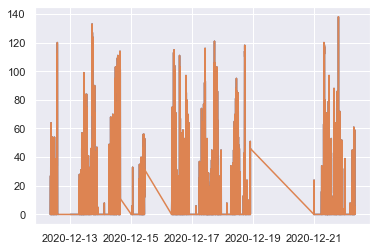

In [16]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='time'))

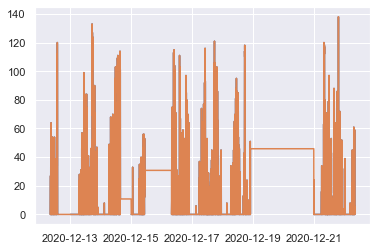

In [19]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='pad'))

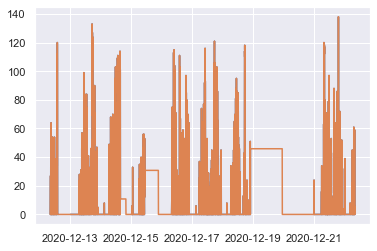

In [26]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='nearest'))

In [80]:
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]
df = fit[record_id][str(ndays)]

In [81]:
import datetime as dt
clocktime = [int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%H")) + (int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%M"))/60) for x in df.index.astype(str)]
df = pd.concat([df.reset_index(), pd.DataFrame(clocktime)], axis=1, ignore_index=True)
df.columns = ['Time', 'Activity', 'Clocktime']
df = df.set_index(['Time'])
df

,Activity,Clocktime
Time,,
2020-12-12 08:19:00,0.0,8.316667
2020-12-12 08:20:00,0.0,8.333333
2020-12-12 08:21:00,0.0,8.350000
2020-12-12 08:22:00,18.0,8.366667
2020-12-12 08:23:00,0.0,8.383333
...,...,...
2020-12-22 08:15:00,31.0,8.250000
2020-12-22 08:16:00,8.0,8.266667
2020-12-22 08:17:00,0.0,8.283333


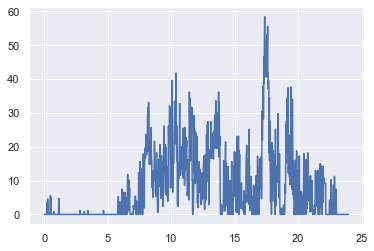

In [84]:
plt.plot(df.groupby('Clocktime').mean())

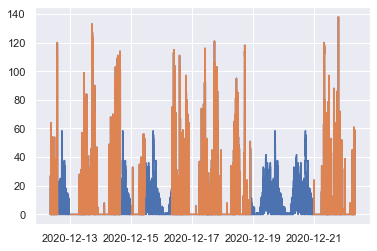

In [88]:
plt.plot(df.index, df.groupby('Clocktime').transform(lambda x: x.fillna(x.mean())))
plt.plot(df.index, df['Activity'])

<a id=’clockfill’></a>
### Clockfill

Now we want to do this for all subjects' fitbit data.

In [ ]:
from wearables import clockfill

fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]
fitFill = {}

for record_id in fit.keys():
    for ndays in fit[record_id].keys():
        try:
            fitFill[str(record_id)][str(ndays)] = clockfill.clockfill(fit[record_id][str(ndays)], record_id, data_dir + 'fitbit/preproc', clockplot=True, interpolateplot=True)
        except Exception as e:
            print(e)
    np.save(data_dir + '/fitbit/fit_clockfill.npy', fit)

## Visualize model fit

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wearables import plotcosinor
import seaborn as sns
sns.set()

for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            d1 = np.load(data_dir + 'fitbit/fit_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d1, 'antilogistic', 'Fitbit')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
        try:
            d = np.load(data_dir + 'actiwatch/act_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d, 'antilogistic', 'Actiwatch 2.0')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_act_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
#         try:
#             d2 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()][record_id][ndays]
#             plotcosinor.plotcosinor(d2, 'antilogistic', 'Fitbit')
#             plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_clockfill_cr_plot.png', dpi = 300)
#             plt.close('all')
#         except Exception as e:
#             print(e)


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20181'
'20181'
'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20178'
'20178'
'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

array must not contain infs or NaNs


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


array must not contain infs or NaNs


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20177'
'20177'
'10076'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'10076'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20180'
'20180'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20184'
'20184'
'Activity'
'Activity'
'20176'
'20176'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20182'
'20182'


In [11]:
from wearables import fitcosinor

cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

fitFill = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()]
cr_fitFill = pd.DataFrame(index = list(fitFill.keys()), columns = cols)

for record_id in fitFill.keys():
    print(record_id)
    for ndays in fitFill[record_id].keys():
        try:
            cr_fitFill.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fitFill[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fitFill.to_csv(data_dir + '/fitbit/cr_fitFill.csv')

10011


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10159
20076
array must not contain infs or NaNs
array must not contain infs or NaNs
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
'Activity'
'Activity'
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


# cr_comparison

By:
* Device
* Condition (Actiwatch arm)
* Age group
* Sex?

In [18]:
np_fit_norm

,IS_7,IV_7,RA_7,L5_7,L5_start_7,M10_7,M10_start_7,IS_10,IV_10,RA_10,L5_10,L5_start_10,M10_10,M10_start_10
10011,0.211173,0.490592,0.994662,"[(4, 56, 0)]",0.000261,"[(16, 36, 0)]",0.097415,0.178219,0.53968,0.996005,"[(5, 2, 0)]",0.000219,"[(16, 18, 0)]",0.109276
10011_repeat,0.198193,0.749923,0.988893,"[(5, 45, 0)]",0.000265,"[(18, 9, 0)]",0.047447,0.155268,0.661632,0.99207,"[(6, 1, 0)]",0.000215,"[(18, 1, 0)]",0.054022
10012,0.215989,0.227477,0.98962,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.099992,0.215989,0.227477,0.98962,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.099992
10014,0.299681,0.320054,0.995989,"[(7, 19, 0)]",0.000233,"[(18, 19, 0)]",0.115741,0.299681,0.320054,0.995989,"[(7, 19, 0)]",0.000233,"[(18, 19, 0)]",0.115741
10016,0.196867,0.238016,0.977573,"[(6, 1, 0)]",0.000937,"[(18, 44, 0)]",0.082579,0.168373,0.209956,0.980661,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.092615
10023,0.208781,0.265767,0.799444,"[(9, 18, 0)]",0.01333,"[(22, 49, 0)]",0.119596,0.175825,0.238707,0.832675,"[(7, 35, 0)]",0.012255,"[(22, 49, 0)]",0.134231
10023_repeat,0.388319,0.528415,0.975703,"[(6, 59, 0)]",0.00094,"[(20, 26, 0)]",0.076448,0.388319,0.528415,0.975703,"[(6, 59, 0)]",0.00094,"[(20, 26, 0)]",0.076448
10024,0.185264,0.36138,0.955808,"[(6, 1, 0)]",0.002209,"[(22, 13, 0)]",0.09776,0.164406,0.373297,0.964232,"[(6, 1, 0)]",0.001768,"[(22, 12, 0)]",0.097104
10025,0.214154,0.413346,0.995079,"[(8, 43, 0)]",0.000222,"[(19, 27, 0)]",0.0901,0.146497,0.417927,0.965834,"[(8, 6, 0)]",0.001428,"[(22, 47, 0)]",0.082151
10033,0.203028,0.314395,0.996298,"[(4, 48, 0)]",0.00018,"[(18, 29, 0)]",0.097113,0.163189,0.336164,0.997413,"[(4, 48, 0)]",0.000124,"[(18, 29, 0)]",0.096046


In [24]:
cr_act_norm

,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_10,amp_10,alpha_10,beta_10,phi_10
10011,0.119642,0.631787,6.941027,6.008397,12.489607,0.125657,0.633785,6.93659,6.002376,12.424477
10011_repeat,0.099246,0.616021,6.933081,5.991641,12.316123,0.111503,0.621919,6.929819,5.987871,12.39319
10012,0.046062,0.585416,6.92288,5.97503,12.543126,0.048274,0.586667,6.922594,5.975502,12.539443
10014,0.100439,0.61823,6.930013,5.993127,12.789156,0.108915,0.621776,6.926538,5.98812,12.804809
10016,0.061137,0.596251,6.937571,5.993571,12.130793,0.071321,0.605493,6.94106,6.007887,12.22354
10023,0.065678,0.590903,6.909753,5.957397,12.411466,0.071322,0.59351,6.909383,5.956507,12.408749
10023_repeat,0.063276,0.593083,6.919413,5.97376,12.235122,0.070277,0.596494,6.917286,5.972534,12.234346
10024,0.049819,0.588718,6.92963,5.984433,12.277653,0.054678,0.590636,6.927699,5.981945,12.32244
10025,0.078769,0.598072,6.904965,5.954247,12.822289,0.080389,0.597922,6.904713,5.952511,12.691759
10033,0.084856,0.613348,6.943492,6.010982,12.365266,0.04461,0.590065,6.940695,6.00129,12.370491


In [10]:
data_dir = '/Volumes/schnyer/Megan/Wearables/data/'

In [11]:
df = pd.read_csv(data_dir + 'WearableAssessment-Validation_DATA_2021-01-29_1236.csv')
df = df.ffill()
df = df[df['redcap_event_name'].str.contains("session_1_arm_1")]
df['subject'] = np.where(df['age_group'] == 1.0, 
                         '1' + df['record_id'].astype(str).str.pad(4,fillchar='0'), 
                         '2' + df['record_id'].astype(str).str.pad(4,fillchar='0'))
df.columns


Index(['record_id', 'redcap_event_name', 'age_group', 'selected_devices___1',
       'selected_devices___2', 'selected_devices___3', 'selected_devices___4',
       'handedness', 'gender', 'ethnicity___1', 'ethnicity___2',
       'ethnicity___3', 'ethnicity___4', 'ethnicity___5', 'ethnicity___6',
       'global_psqi', 'actiwatch_arm', 'bed_time', 'fall_asleep', 'wake_time',
       'hours_bed', 'hours_slept', 'tr_sleep_30', 'tr_wakeup',
       'tr_use_bathroom', 'tr_breathing', 'tr_snoring', 'tr_too_cold',
       'tr_too_hot', 'tr_dreams', 'tr_pain', 'other_sleep', 'other_explain',
       'sleep_medication', 'trouble_staying_awake', 'sleep_enthusiasm',
       'sleep_quality', 'component_one', 'fall_asleep_raw',
       'sleep_latency_raw', 'component_two', 'component_three',
       'sleep_efficiency', 'component_four', 'sleep_disruption_raw',
       'component_five', 'component_six', 'sleep_dysfunction_raw',
       'component_seven', 'subject'],
      dtype='object')

In [12]:
df = df[['subject', 'age_group', 'selected_devices___1', 'selected_devices___2', 'selected_devices___3', 'selected_devices___4', 'handedness', 'gender', 'actiwatch_arm']]
df = df.set_index('subject')
df = df.rename(columns={"selected_devices___1": "Actiwatch 2.0", "selected_devices___2": "Fitbit Charge 2 HR", \
                       "selected_devices___3": "Fitbit Inspire HR", "selected_devices___4": "Fitbit Inspire 2"})

conditions = [ df['Fitbit Charge 2 HR'] == 1.0, (df['Fitbit Inspire HR'] == 1.0), df['Fitbit Inspire 2'] == 1.0 ]
choices = [ 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2' ]
    
df['fitbit_device'] = np.select(conditions, choices, default="Fitbit Charge 2 HR")
df['age_group'] = df['age_group'].astype('int')

df = df.drop(['Actiwatch 2.0', 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2'], axis=1)

In [13]:
df.to_csv(data_dir + 'df_main.csv')

In [14]:
exclude = ['10023', '10076', '20182', '20184', '20176', '10151']
df = df[~df.index.isin(exclude)]
df

,age_group,handedness,gender,actiwatch_arm,fitbit_device
subject,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR


In [15]:
cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv', index_col='Unnamed: 0')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv', index_col='Unnamed: 0')
np_act = pd.read_csv(data_dir + 'actiwatch/np_act.csv', index_col='Unnamed: 0')
np_fit = pd.read_csv(data_dir + 'fitbit/np_fit.csv', index_col='Unnamed: 0')

cr_act_norm = pd.read_csv(data_dir + 'actiwatch/cr_act_norm.csv', index_col='Unnamed: 0')
cr_fit_norm = pd.read_csv(data_dir + 'fitbit/cr_fit_norm.csv', index_col='Unnamed: 0')
np_act_norm = pd.read_csv(data_dir + 'actiwatch/np_act_norm.csv', index_col='Unnamed: 0')
np_fit_norm = pd.read_csv(data_dir + 'fitbit/np_fit_norm.csv', index_col='Unnamed: 0')
# cr_fitFill = pd.read_csv(data_dir + 'fitbit/cr_fitFill.csv', index_col='Unnamed: 0')
# cr_fitFill.columns = cr_fitFill.columns.astype(str) + '_fitFill'

cr = cr_act.join(cr_fit, lsuffix='_act', rsuffix='_fit')
np = np_act.join(np_fit, lsuffix='_act', rsuffix='_fit')

cr_norm = cr_act_norm.join(cr_fit_norm, lsuffix='_act_norm', rsuffix='_fit_norm')
np_norm = np_act_norm.join(np_fit_norm, lsuffix='_act_norm', rsuffix='_fit_norm')
# cr = cr.join(cr_fitFill)

cr = cr.rename_axis('subject')
cr_norm = cr_norm.rename_axis('subject')
cr_all = cr.join(cr_norm)

np = np.rename_axis('subject')
np_norm = np_norm.rename_axis('subject')
np_all = np.join(np_norm)

df1 = df.join(cr_all)
df1 = df1.join(np_all)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,L5_7_fit_norm,M10_start_7_fit_norm,M10_7_fit_norm,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696424,14.860626,...,0.000261,"[(16, 36, 0)]",0.097415,0.178219,0.539680,0.996005,"[(5, 2, 0)]",0.000219,"[(16, 18, 0)]",0.109276
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,0.000522,"[(20, 33, 0)]",0.099992,0.215989,0.227477,0.989620,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.099992
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240345,16.530384,...,0.000233,"[(18, 19, 0)]",0.115741,0.299681,0.320054,0.995989,"[(7, 19, 0)]",0.000233,"[(18, 19, 0)]",0.115741
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254814,15.080706,...,0.000937,"[(18, 44, 0)]",0.082579,0.168373,0.209956,0.980661,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.092615
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895309,15.278563,...,0.002209,"[(22, 13, 0)]",0.097760,0.164406,0.373297,0.964232,"[(6, 1, 0)]",0.001768,"[(22, 12, 0)]",0.097104
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232350,1.736841,-0.722796,14.288592,18.348139,...,0.000222,"[(19, 27, 0)]",0.090100,0.146497,0.417927,0.965834,"[(8, 6, 0)]",0.001428,"[(22, 47, 0)]",0.082151
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,0.000180,"[(18, 29, 0)]",0.097113,0.163189,0.336164,0.997413,"[(4, 48, 0)]",0.000124,"[(18, 29, 0)]",0.096046
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280499,17.693718,...,0.000353,"[(19, 7, 0)]",0.107112,0.205456,0.252865,0.994860,"[(8, 7, 0)]",0.000266,"[(20, 31, 0)]",0.103337
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863987,-0.677725,154.241915,16.045847,...,0.000530,"[(17, 12, 0)]",0.076626,0.132653,0.349661,0.987029,"[(6, 7, 0)]",0.000525,"[(17, 32, 0)]",0.080461


In [16]:
df1.columns

Index(['age_group', 'handedness', 'gender', 'actiwatch_arm', 'fitbit_device',
       'actmin_7_act', 'amp_7_act', 'alpha_7_act', 'beta_7_act', 'phi_7_act',
       ...
       'L5_7_fit_norm', 'M10_start_7_fit_norm', 'M10_7_fit_norm',
       'IS_10_fit_norm', 'IV_10_fit_norm', 'RA_10_fit_norm',
       'L5_start_10_fit_norm', 'L5_10_fit_norm', 'M10_start_10_fit_norm',
       'M10_10_fit_norm'],
      dtype='object', length=101)

In [17]:
repeatSubs = [subject[0:5] for subject in cr.index[cr.index.str.contains('repeat')].to_list()]

In [18]:
beiweFiles = glob.glob(data_dir + 'fitbit/WA_*Narrow_beiwe*')
beiweSubs = [file.split('WA_')[1][0:5] for file in beiweFiles]

In [21]:
# df1['beiwe'] = np.where((df1.index.isin(beiweSubs)) & (~df1.index.isin(repeatSubs)), 1, 0)
# df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,L5_7_fit_norm,M10_start_7_fit_norm,M10_7_fit_norm,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696424,14.860626,...,0.000261,"[(16, 36, 0)]",0.097415,0.178219,0.539680,0.996005,"[(5, 2, 0)]",0.000219,"[(16, 18, 0)]",0.109276
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,0.000522,"[(20, 33, 0)]",0.099992,0.215989,0.227477,0.989620,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.099992
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240345,16.530384,...,0.000233,"[(18, 19, 0)]",0.115741,0.299681,0.320054,0.995989,"[(7, 19, 0)]",0.000233,"[(18, 19, 0)]",0.115741
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254814,15.080706,...,0.000937,"[(18, 44, 0)]",0.082579,0.168373,0.209956,0.980661,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.092615
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895309,15.278563,...,0.002209,"[(22, 13, 0)]",0.097760,0.164406,0.373297,0.964232,"[(6, 1, 0)]",0.001768,"[(22, 12, 0)]",0.097104
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232350,1.736841,-0.722796,14.288592,18.348139,...,0.000222,"[(19, 27, 0)]",0.090100,0.146497,0.417927,0.965834,"[(8, 6, 0)]",0.001428,"[(22, 47, 0)]",0.082151
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,0.000180,"[(18, 29, 0)]",0.097113,0.163189,0.336164,0.997413,"[(4, 48, 0)]",0.000124,"[(18, 29, 0)]",0.096046
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280499,17.693718,...,0.000353,"[(19, 7, 0)]",0.107112,0.205456,0.252865,0.994860,"[(8, 7, 0)]",0.000266,"[(20, 31, 0)]",0.103337
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863987,-0.677725,154.241915,16.045847,...,0.000530,"[(17, 12, 0)]",0.076626,0.132653,0.349661,0.987029,"[(6, 7, 0)]",0.000525,"[(17, 32, 0)]",0.080461


actiwatch arm: 1 right, 2 left
handedness: 1 left, 2 right

In [22]:
df1['actiwatch_assignment'] = np.where(df1['handedness'] - df1['actiwatch_arm'] == 0, 'dominant', 'non-dominant')

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_62253/2781761378.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.where except for the arguments 'cond' and 'other' will be keyword-only
  df1['actiwatch_assignment'] = np.where(df1['handedness'] - df1['actiwatch_arm'] == 0, 'dominant', 'non-dominant')


ValueError: For argument "inplace" expected type bool, received type str.

In [18]:
df1['amp_dif'] = df1['amp_7_act'] - df1['amp_7_fit']
df1['phi_dif'] = df1['phi_7_act'] - df1['phi_7_fit']

# df1['amp_difFill'] = df1['amp_7_act'] - df1['amp_7_fitFill']
# df1['phi_difFill'] = df1['phi_7_act'] - df1['phi_7_fitFill']

df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,phi_7_fit_norm,actmin_10_fit_norm,amp_10_fit_norm,alpha_10_fit_norm,beta_10_fit_norm,phi_10_fit_norm,beiwe,actiwatch_assignment,amp_dif,phi_dif
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696424,14.860626,...,12.520589,0.108919,0.638727,6.965317,6.058454,12.218654,0,dominant,0.299313,0.495212
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,13.221596,0.074284,0.598421,6.909347,5.956762,13.221596,0,dominant,-0.077888,0.084937
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240345,16.530384,...,13.192670,0.076830,0.604856,6.931271,5.984985,13.192670,0,dominant,0.362328,0.673385
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254814,15.080706,...,11.993790,0.090920,0.629930,6.964062,6.060126,12.070616,0,non-dominant,-0.113580,0.385760
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895309,15.278563,...,12.994334,0.104061,0.623410,6.927397,5.998150,13.120831,0,non-dominant,-0.046653,-0.596908
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232350,1.736841,-0.722796,14.288592,18.348139,...,13.038374,0.102904,0.616760,6.912507,5.973147,13.143873,0,non-dominant,0.380783,0.251283
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281244,1.506147,-0.445038,12.286829,14.551711,...,12.532404,0.098444,0.628965,6.955405,6.036796,12.953997,0,dominant,0.085218,0.154408
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055961,1.885233,-0.794379,161.280499,17.693718,...,13.078311,0.115170,0.617936,6.893479,5.946980,13.267451,0,non-dominant,0.320157,0.517501
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.863987,-0.677725,154.241915,16.045847,...,12.113041,0.100184,0.627243,6.955985,6.035758,12.374404,0,dominant,-0.348078,0.054918


In [55]:
df1.sort_index().index

Index(['10011', '10012', '10014', '10016', '10024', '10025', '10033', '10035',
       '10038', '10040', '10045', '10049', '10057', '10062', '10121', '10135',
       '10136', '10137', '10139', '10140', '10143', '10144', '10145', '10146',
       '10147', '10148', '10149', '10150', '10152', '10159', '20076', '20103',
       '20105', '20108', '20113', '20115', '20120', '20122', '20123', '20124',
       '20125', '20127', '20129', '20131', '20142', '20154', '20155', '20157',
       '20160', '20163', '20168', '20174', '20177', '20178', '20180', '20181'],
      dtype='object', name='subject')

### Number of subjects & some basic descriptive statistics

In [44]:
df1.groupby('age_group').describe()

handedness                                              gender  \
               count      mean       std  min  25%  50%  75%  max  count   
age_group                                                                  
1               30.0  1.900000  0.305129  1.0  2.0  2.0  2.0  2.0   30.0   
2               26.0  1.961538  0.344182  1.0  2.0  2.0  2.0  3.0   26.0   

                     ... L5_10_fit_norm           M10_10_fit_norm            \
               mean  ...            75%       max           count      mean   
age_group            ...                                                      
1          1.733333  ...       0.000965  0.001768            20.0  0.080499   
2          1.538462  ...       0.001720  0.003442            23.0  0.110128   

                                                                       
                std       min       25%       50%       75%       max  
age_group                                                              
1          0.028656  0.027321  0.060323  0.087383  0.099561  0.129467  
2          0.048043  0.037553  0.078458  0.094062  0.141390  0.236893  

[2 rows x 664 columns]

In [24]:
df1.groupby('fitbit_device').describe()

age_group                                               \
                       count      mean       std  min  25%  50%  75%  max   
fitbit_device                                                               
Fitbit Charge 2 HR      35.0  1.457143  0.505433  1.0  1.0  1.0  2.0  2.0   
Fitbit Inspire HR       21.0  1.476190  0.511766  1.0  1.0  1.0  2.0  2.0   

                   handedness            ... L5_10_fit_norm            \
                        count      mean  ...            75%       max   
fitbit_device                            ...                            
Fitbit Charge 2 HR       35.0  1.914286  ...       0.001428  0.003442   
Fitbit Inspire HR        21.0  1.952381  ...       0.001512  0.002291   

                   M10_10_fit_norm                                          \
                             count      mean       std       min       25%   
fitbit_device                                                                
Fitbit Charge 2 HR            25.0  0.104364  0.044595  0.037553  0.080461   
Fitbit Inspire HR             18.0  0.085212  0.037732  0.027321  0.058263   

                                                  
                         50%       75%       max  
fitbit_device                                     
Fitbit Charge 2 HR  0.096046  0.109276  0.236893  
Fitbit Inspire HR   0.091089  0.104213  0.146360  

[2 rows x 672 columns]

In [21]:
df1[['age_group', 'amp_7_fit']]

,age_group,amp_7_fit
subject,,
10011,1,1.340000
10012,1,1.727991
10014,1,1.215844
10016,1,1.427050
10024,1,1.581538
10025,1,1.356058
10033,1,1.420929
10035,1,1.565076
10038,1,1.212065


## Correlations

In [27]:
df1[df1.columns[df1.columns.str.contains('7_fit|7_act')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('7_fit')].to_list()[0:5]][0:5]

,actmin_7_fit,amp_7_fit,alpha_7_fit,beta_7_fit,phi_7_fit
actmin_7_act,0.272202,0.198838,-0.001156,0.191142,0.138992
amp_7_act,-0.248580,-0.072912,-0.110325,-0.194465,-0.028279
alpha_7_act,-0.199699,0.235668,0.068918,0.077937,-0.329093
beta_7_act,-0.032724,0.102801,-0.259251,0.338228,-0.044750
phi_7_act,0.126619,-0.261744,0.062095,0.074584,0.701434


In [44]:
print(df1[df1.columns[df1.columns.str.contains('7_fit|7_act')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('7_fit')].to_list()[0:5]][0:5].to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
{} &  actmin\_7\_fit &  amp\_7\_fit &  alpha\_7\_fit &  beta\_7\_fit &  phi\_7\_fit \\
\midrule
actmin\_7\_act &          0.27 &       0.20 &        -0.00 &        0.19 &       0.14 \\
amp\_7\_act    &         -0.25 &      -0.07 &        -0.11 &       -0.19 &      -0.03 \\
alpha\_7\_act  &         -0.20 &       0.24 &         0.07 &        0.08 &      -0.33 \\
beta\_7\_act   &         -0.03 &       0.10 &        -0.26 &        0.34 &      -0.04 \\
phi\_7\_act    &          0.13 &      -0.26 &         0.06 &        0.07 &       0.70 \\
\bottomrule
\end{tabular}



In [39]:
df1[df1.columns[df1.columns.str.contains('7_act_norm|7_fit_norm')].to_list()].astype('float64').corr(method = 'spearman')[df1.columns[df1.columns.str.contains('7_fit_norm')].to_list()[0:5]][0:5]

,actmin_7_fit_norm,amp_7_fit_norm,alpha_7_fit_norm,beta_7_fit_norm,phi_7_fit_norm
actmin_7_act_norm,0.208025,0.297641,0.129625,0.138529,0.061864
amp_7_act_norm,0.267461,0.577706,0.534228,0.546253,-0.191374
alpha_7_act_norm,0.198543,0.654602,0.894080,0.869218,-0.592044
beta_7_act_norm,0.230458,0.709528,0.889223,0.896277,-0.517461
phi_7_act_norm,-0.100601,-0.284112,-0.526249,-0.435708,0.714616


In [42]:
print(df1[df1.columns[df1.columns.str.contains('7_act_norm|7_fit_norm')].to_list()].astype('float64').corr(method = 'spearman')[df1.columns[df1.columns.str.contains('7_fit_norm')].to_list()[0:5]][0:5].to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
{} &  actmin\_7\_fit\_norm &  amp\_7\_fit\_norm &  alpha\_7\_fit\_norm &  beta\_7\_fit\_norm &  phi\_7\_fit\_norm \\
\midrule
actmin\_7\_act\_norm &               0.21 &            0.30 &              0.13 &             0.14 &            0.06 \\
amp\_7\_act\_norm    &               0.27 &            0.58 &              0.53 &             0.55 &           -0.19 \\
alpha\_7\_act\_norm  &               0.20 &            0.65 &              0.89 &             0.87 &           -0.59 \\
beta\_7\_act\_norm   &               0.23 &            0.71 &              0.89 &             0.90 &           -0.52 \\
phi\_7\_act\_norm    &              -0.10 &           -0.28 &             -0.53 &            -0.44 &            0.71 \\
\bottomrule
\end{tabular}



In [131]:
print('Minimum')
print(df2.partial_corr(x='actmin_7_act', y='actmin_7_fit', method='spearman').round(4))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act', y='amp_7_fit', method='spearman').round(4))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act', y='alpha_7_fit', method='spearman').round(4))
print('Beta')
print(df2.partial_corr(x='beta_7_act', y='beta_7_fit', method='spearman').round(4))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act', y='phi_7_fit', method='spearman').round(5))



Minimum
           n       r          CI95%   p-val
spearman  47  0.2722  [-0.02, 0.52]  0.0642
Amplitude
           n       r          CI95%   p-val
spearman  47 -0.0729  [-0.35, 0.22]  0.6262
Alpha
           n       r          CI95%   p-val
spearman  47  0.0689  [-0.22, 0.35]  0.6453
Beta
           n       r         CI95%   p-val
spearman  47  0.3382  [0.06, 0.57]  0.0201
Acrophase
           n        r         CI95%  p-val
spearman  47  0.70143  [0.52, 0.82]    0.0


In [134]:
print('Minimum')
print(df2.partial_corr(x='actmin_7_act_norm', y='actmin_7_fit_norm', method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act_norm', y='amp_7_fit_norm', method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act_norm', y='alpha_7_fit_norm', method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act_norm', y='beta_7_fit_norm', method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act_norm', y='phi_7_fit_norm', method='spearman').round(3))

Minimum
           n      r          CI95%  p-val
spearman  47  0.208  [-0.08, 0.47]  0.161
Amplitude
           n      r         CI95%  p-val
spearman  47  0.578  [0.35, 0.74]    0.0
Alpha
           n      r         CI95%  p-val
spearman  47  0.894  [0.82, 0.94]    0.0
Beta
           n      r         CI95%  p-val
spearman  47  0.896  [0.82, 0.94]    0.0
Acrophase
           n      r         CI95%  p-val
spearman  47  0.715  [0.54, 0.83]    0.0


### Non-parametric measure correlations

In [32]:
df1[df1.columns[df1.columns.str.contains('IS_7|IV_7|RA_7')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('IS_7_fit|IV_7_fit|RA_7_fit')].to_list()]
                                         

,IS_7_fit,IV_7_fit,RA_7_fit,IS_7_fit_norm,IV_7_fit_norm,RA_7_fit_norm
IS_7_act,0.667944,0.056794,0.271603,0.667944,0.056794,0.271603
IV_7_act,-0.495819,0.554181,-0.248780,-0.495819,0.554181,-0.248780
RA_7_act,0.402265,-0.109930,0.641463,0.402265,-0.109930,0.641463
IS_7_fit,1.000000,-0.230162,0.243693,1.000000,-0.230162,0.243693
IV_7_fit,-0.230162,1.000000,-0.187738,-0.230162,1.000000,-0.187738
RA_7_fit,0.243693,-0.187738,1.000000,0.243693,-0.187738,1.000000
IS_7_act_norm,0.667944,0.056794,0.271603,0.667944,0.056794,0.271603
IV_7_act_norm,-0.495819,0.554181,-0.248780,-0.495819,0.554181,-0.248780
RA_7_act_norm,0.402265,-0.109930,0.641463,0.402265,-0.109930,0.641463
IS_7_fit_norm,1.000000,-0.230162,0.243693,1.000000,-0.230162,0.243693


In [34]:
print(df1[df1.columns[df1.columns.str.contains('IS_7|IV_7|RA_7')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('IS_7_fit|IV_7_fit|RA_7_fit')].to_list()]
     .to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
{} &  IS\_7\_fit &  IV\_7\_fit &  RA\_7\_fit &  IS\_7\_fit\_norm &  IV\_7\_fit\_norm &  RA\_7\_fit\_norm \\
\midrule
IS\_7\_act      &      0.67 &      0.06 &      0.27 &           0.67 &           0.06 &           0.27 \\
IV\_7\_act      &     -0.50 &      0.55 &     -0.25 &          -0.50 &           0.55 &          -0.25 \\
RA\_7\_act      &      0.40 &     -0.11 &      0.64 &           0.40 &          -0.11 &           0.64 \\
IS\_7\_fit      &      1.00 &     -0.23 &      0.24 &           1.00 &          -0.23 &           0.24 \\
IV\_7\_fit      &     -0.23 &      1.00 &     -0.19 &          -0.23 &           1.00 &          -0.19 \\
RA\_7\_fit      &      0.24 &     -0.19 &      1.00 &           0.24 &          -0.19 &           1.00 \\
IS\_7\_act\_norm &      0.67 &      0.06 &      0.27 &           0.67 &           0.06 &           0.27 \\
IV\_7\_act\_norm &     -0.50 &      0.55 &     -0.25 &          -0.50 &           0.55 &          -0.25 \\

In [40]:
import pingouin as pg

print('IS')
print(df1.partial_corr(x='IS_7_act', y='IS_7_fit', method='spearman').round(4))
print('IV')
print(df1.partial_corr(x='IV_7_act', y='IV_7_fit', method='spearman').round(4))
print('RA')
print(df1.partial_corr(x='RA_7_act', y='RA_7_fit', method='spearman').round(4))

IS
           n       r         CI95%  p-val
spearman  41  0.6679  [0.45, 0.81]    0.0
IV
           n       r        CI95%   p-val
spearman  41  0.5542  [0.3, 0.74]  0.0002
RA
           n       r         CI95%  p-val
spearman  41  0.6415  [0.42, 0.79]    0.0


In [39]:
import pingouin as pg

print('IS')
print(df1.partial_corr(x='IS_7_act_norm', y='IS_7_fit_norm', method='spearman').round(3))
print('IV')
print(df1.partial_corr(x='IV_7_act_norm', y='IV_7_fit_norm', method='spearman').round(3))
print('RA')
print(df1.partial_corr(x='RA_7_act_norm', y='RA_7_fit_norm', method='spearman').round(3))

IS
           n      r         CI95%  p-val
spearman  41  0.668  [0.45, 0.81]    0.0
IV
           n      r        CI95%  p-val
spearman  41  0.554  [0.3, 0.74]    0.0
RA
           n      r         CI95%  p-val
spearman  41  0.641  [0.42, 0.79]    0.0


## Partial correlations covarying for resting heart rate and bmi

dailyActivity RestingHeartRate
weightLogInfo BMI

In [88]:
weight = []
weight_files = sorted(glob.glob(data_dir + 'fitbit/*weightLogInfo*.csv'))
beiwe_weight_files = sorted(glob.glob(data_dir + 'Megan Fitbit data/*/fitbit_daily_records.csv'))
# for file in weight_files:
#     weight = pd.read_csv(file)
#     print(os.path.basename(file))
#     print(weight['BMI'])

for file in beiwe_weight_files:
    weightdf = pd.read_csv(file)
    print(os.path.basename(os.path.dirname(file)))
    print(weightdf['body_bmi'].mean())
    weight.append([os.path.basename(os.path.dirname(file)), weightdf['body_bmi'].mean()])


105
23.57395362854
11-8fahydu5
28.341773986816403
11
28.341773986816403
151
15.907375277453692
152
34.44491958618159
163
21.969940185546896
164
21.224857330322298
168
27.1093730926514
176
nan
177
22.955862045288093
178
26.62418014584607
180
25.3899116516113
181
25.520832061767603
182
26.458278656005895
184
24.961469650268604
23
27.1482048034668
45
20.3616027832031
76
22.7045574188232


In [114]:
weightdf = pd.DataFrame(weight, columns = ['beiwe_id', 'bmi'])
weightdf['beiwe_id'] = weightdf['beiwe_id'].str.zfill(3)
df1['beiwe_id'] = df1.index.str[-3:]
df2 = pd.merge(df1, weightdf, on = 'beiwe_id', how = 'outer')
df2 = df2.set_index('subject')
df2

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,amp_10_fit_norm,alpha_10_fit_norm,beta_10_fit_norm,phi_10_fit_norm,beiwe,actiwatch_assignment,amp_dif,phi_dif,beiwe_id,bmi
subject,,,,,,,,,,,,,,,,,,,,,
10011,1.0,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175642,1.639313,-0.731704,409.696424,14.860626,...,0.638727,6.965317,6.058454,12.218654,0.0,dominant,0.299313,0.495212,011,28.341774
10012,1.0,1.0,2.0,1.0,Fitbit Charge 2 HR,1.234697,1.650103,-0.679612,18.606358,16.692487,...,0.598421,6.909347,5.956762,13.221596,0.0,dominant,-0.077888,0.084937,012,NaN
10014,1.0,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256328,1.578173,-0.693268,14.240345,16.530384,...,0.604856,6.931271,5.984985,13.192670,0.0,dominant,0.362328,0.673385,014,NaN
10016,1.0,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625095,1.313470,-0.702661,46.254814,15.080706,...,0.629930,6.964062,6.060126,12.070616,0.0,non-dominant,-0.113580,0.385760,016,NaN
10024,1.0,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394889,1.534885,-0.840442,151.895309,15.278563,...,0.623410,6.927397,5.998150,13.120831,0.0,non-dominant,-0.046653,-0.596908,024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164,21.224857
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182,26.458279


In [40]:
rhr = []
rhr_files = sorted(glob.glob(data_dir + 'fitbit/*dailyActivity*.csv'))
for file in rhr_files:
    dailyActivity = pd.read_csv(file)
    print(os.path.basename(file).split("WA_")[1].split('_daily')[0])
    print(dailyActivity['RestingHeartRate'].mean())
    rhr.append([os.path.basename(file).split("WA_")[1].split('_daily')[0], dailyActivity['RestingHeartRate'].mean()])

10011
53.4
10012
69.28571428571429
10014
76.375
10016
58.44444444444444
10023
68.07142857142857
10024
73.93333333333334
10025
69.26666666666667
10033
65.73333333333333
10035
70.6
10038
70.0
10040
59.06666666666667
10045
61.06666666666667
10049
nan
10062
65.26666666666667
10139
65.21428571428571
10140
69.57142857142857
10143
76.58333333333333
10144
61.333333333333336
10145
69.33333333333333
10146
71.4
10147
59.666666666666664
10148
54.5
10149
64.75
10150
55.666666666666664
10159
83.0
20076
62.86666666666667
20103
63.92307692307692
20105
56.93333333333333
20108
72.8
20113
65.53333333333333
20115
59.53333333333333
20120
63.166666666666664
20122
72.91666666666667
20123
59.583333333333336
20124
65.5
20125
61.166666666666664
20127
59.285714285714285
20129
nan
20131
73.16666666666667
20142
60.63636363636363
20154
72.0
20155
68.41666666666667
20157
71.66666666666667


In [41]:
rhr

[['10011', 53.4],
 ['10012', 69.28571428571429],
 ['10014', 76.375],
 ['10016', 58.44444444444444],
 ['10023', 68.07142857142857],
 ['10024', 73.93333333333334],
 ['10025', 69.26666666666667],
 ['10033', 65.73333333333333],
 ['10035', 70.6],
 ['10038', 70.0],
 ['10040', 59.06666666666667],
 ['10045', 61.06666666666667],
 ['10049', nan],
 ['10062', 65.26666666666667],
 ['10139', 65.21428571428571],
 ['10140', 69.57142857142857],
 ['10143', 76.58333333333333],
 ['10144', 61.333333333333336],
 ['10145', 69.33333333333333],
 ['10146', 71.4],
 ['10147', 59.666666666666664],
 ['10148', 54.5],
 ['10149', 64.75],
 ['10150', 55.666666666666664],
 ['10159', 83.0],
 ['20076', 62.86666666666667],
 ['20103', 63.92307692307692],
 ['20105', 56.93333333333333],
 ['20108', 72.8],
 ['20113', 65.53333333333333],
 ['20115', 59.53333333333333],
 ['20120', 63.166666666666664],
 ['20122', 72.91666666666667],
 ['20123', 59.583333333333336],
 ['20124', 65.5],
 ['20125', 61.166666666666664],
 ['20127', 59.28571

In [115]:
rhrdf = pd.DataFrame(rhr, columns = ['subject', 'rhr']).set_index('subject')
df2 = pd.merge(df2, rhrdf, on = 'subject', how = 'outer')
df2.groupby('age_group').describe()


handedness                                              gender  \
               count      mean       std  min  25%  50%  75%  max  count   
age_group                                                                  
1.0             30.0  1.900000  0.305129  1.0  2.0  2.0  2.0  2.0   30.0   
2.0             26.0  1.961538  0.344182  1.0  2.0  2.0  2.0  3.0   26.0   

                     ...        bmi              rhr                       \
               mean  ...        75%        max count       mean       std   
age_group            ...                                                    
1.0        1.733333  ...  31.393347  34.444920  23.0  66.237284  7.609517   
2.0        1.538462  ...  25.796669  27.109373  17.0  65.240891  5.560074   

                                                                  
                 min        25%        50%        75%        max  
age_group                                                         
1.0        53.400000  60.366667  65.733333  70.300000  83.000000  
2.0        56.933333  60.636364  63.923077  71.666667  73.166667  

[2 rows x 384 columns]

[How to calculate partial correlation in python](https://www.statology.org/partial-correlation-python/)

In [116]:
import pingouin as pg

print('Minimum')
print(df2.partial_corr(x='actmin_7_act', y='actmin_7_fit', covar=['rhr'], method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act', y='amp_7_fit', covar=['rhr'], method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act', y='alpha_7_fit', covar=['rhr'], method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act', y='beta_7_fit', covar=['rhr'], method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act', y='phi_7_fit', covar=['rhr'], method='spearman').round(3))


Minimum
           n      r          CI95%  p-val
spearman  39  0.234  [-0.09, 0.51]  0.158
Amplitude
           n      r         CI95%  p-val
spearman  39 -0.126  [-0.43, 0.2]  0.452
Alpha
           n      r         CI95%  p-val
spearman  39  0.024  [-0.3, 0.34]  0.885
Beta
           n      r          CI95%  p-val
spearman  39  0.167  [-0.16, 0.46]  0.317
Acrophase
           n      r         CI95%  p-val
spearman  39  0.687  [0.47, 0.83]    0.0


In [123]:
print('Minimum')
print(df2.partial_corr(x='actmin_7_act_norm', y='actmin_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act_norm', y='amp_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act_norm', y='alpha_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Beta')
print(df2.partial_corr(x='beta_7_act_norm', y='beta_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act_norm', y='phi_7_fit_norm', covar=['rhr'], method='spearman').round(5))



Minimum
           n        r         CI95%    p-val
spearman  39  0.23057  [-0.1, 0.51]  0.16372
Amplitude
           n        r         CI95%   p-val
spearman  39  0.58907  [0.33, 0.76]  0.0001
Alpha
           n        r        CI95%  p-val
spearman  39  0.89352  [0.8, 0.94]    0.0
Beta
           n        r         CI95%  p-val
spearman  39  0.88036  [0.78, 0.94]    0.0
Acrophase
           n        r        CI95%    p-val
spearman  39  0.64798  [0.41, 0.8]  0.00001


In [118]:
import pingouin as pg

print('Minimum')
print(df2.partial_corr(x='actmin_7_act', y='actmin_7_fit', covar=['bmi'], method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act', y='amp_7_fit', covar=['bmi'], method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act', y='alpha_7_fit', covar=['bmi'], method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act', y='beta_7_fit', covar=['bmi'], method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act', y='phi_7_fit', covar=['bmi'], method='spearman').round(3))


Minimum
           n      r         CI95%  p-val
spearman  11  0.127  [-0.55, 0.7]  0.726
Amplitude
           n      r          CI95%  p-val
spearman  11 -0.236  [-0.75, 0.46]  0.511
Alpha
           n      r         CI95%  p-val
spearman  11  0.745  [0.22, 0.94]  0.013
Beta
           n      r          CI95%  p-val
spearman  11  0.009  [-0.62, 0.64]   0.98
Acrophase
           n      r         CI95%  p-val
spearman  11  0.673  [0.07, 0.91]  0.033


In [120]:
print('Minimum')
print(df2.partial_corr(x='actmin_7_act_norm', y='actmin_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act_norm', y='amp_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act_norm', y='alpha_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act_norm', y='beta_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act_norm', y='phi_7_fit_norm', covar=['bmi'], method='spearman').round(4))



Minimum
           n      r          CI95%  p-val
spearman  11 -0.236  [-0.75, 0.46]  0.511
Amplitude
           n      r          CI95%  p-val
spearman  11  0.182  [-0.51, 0.73]  0.615
Alpha
           n      r         CI95%  p-val
spearman  11  0.836  [0.44, 0.96]  0.003
Beta
           n      r         CI95%  p-val
spearman  11  0.755  [0.24, 0.94]  0.012
Acrophase
           n       r         CI95%   p-val
spearman  11  0.9273  [0.72, 0.98]  0.0001


<AxesSubplot:xlabel='amp_10_act', ylabel='amp_10_fit'>

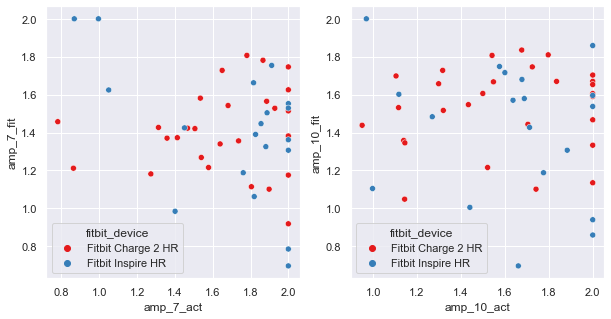

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7_act', y = 'amp_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_10_act', y = 'amp_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='actmin_10_act', ylabel='actmin_10_fit'>

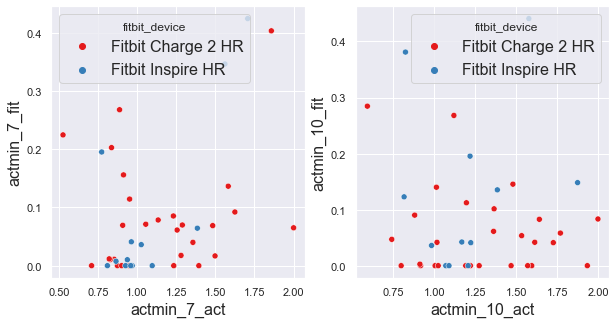

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'actmin_7_act', y = 'actmin_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'actmin_10_act', y = 'actmin_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='beta_10_act', ylabel='beta_10_fit'>

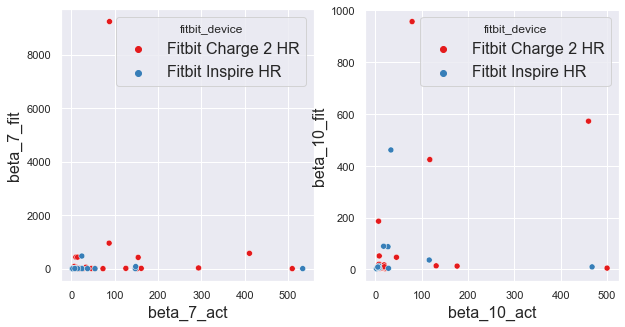

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'beta_7_act', y = 'beta_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'beta_10_act', y = 'beta_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='alpha_10_act', ylabel='alpha_10_fit'>

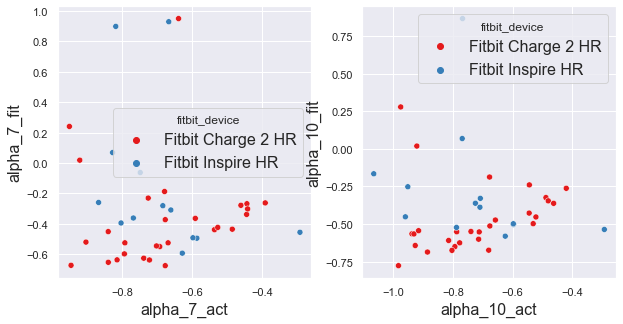

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'alpha_7_act', y = 'alpha_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'alpha_10_act', y = 'alpha_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='phi_10_act', ylabel='phi_10_fit'>

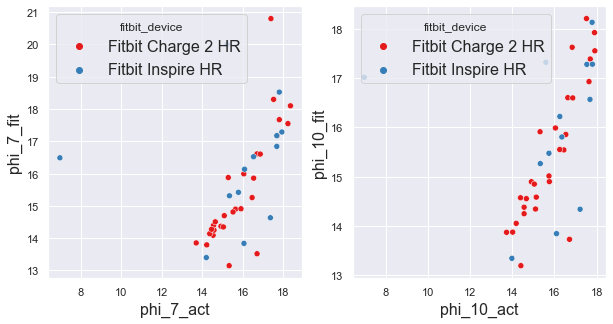

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7_act', y = 'phi_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_10_act', y = 'phi_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='fitbit_device', ylabel='amp_dif'>

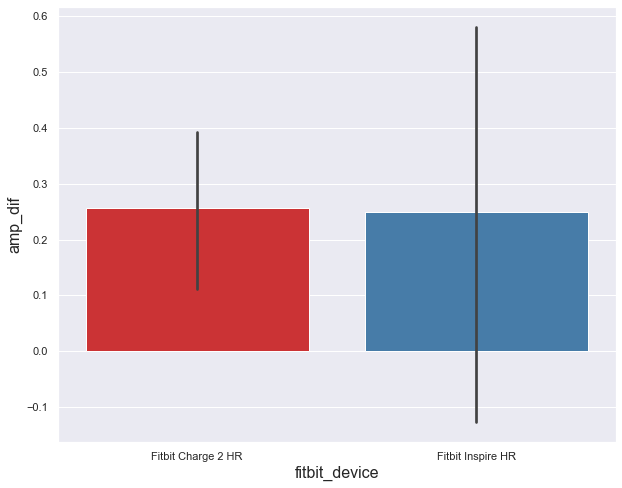

In [36]:
# fig, axs = plt.subplots(1, 1, sharex=True, sharey=False)
sns.barplot(x = 'fitbit_device', y = 'amp_dif', ci=95, data = df1, palette = 'Set1')
# sns.barplot(ax = axs[1], x = 'fitbit_device', y = 'amp_difFill', ci=95, data = df1, palette = 'Set1')


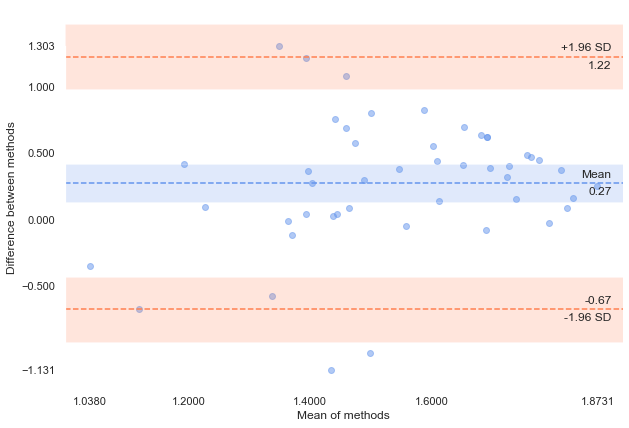

In [45]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['amp_7_act'].values, df2['amp_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

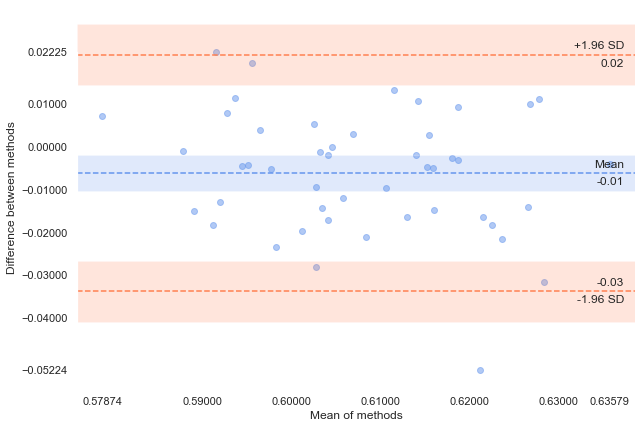

In [46]:
pyCompare.blandAltman(df2['amp_7_act_norm'].values, df2['amp_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

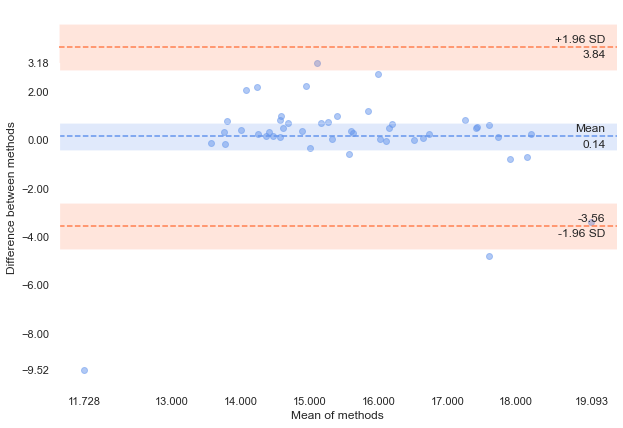

In [47]:
pyCompare.blandAltman(df2['phi_7_act'].values, df2['phi_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

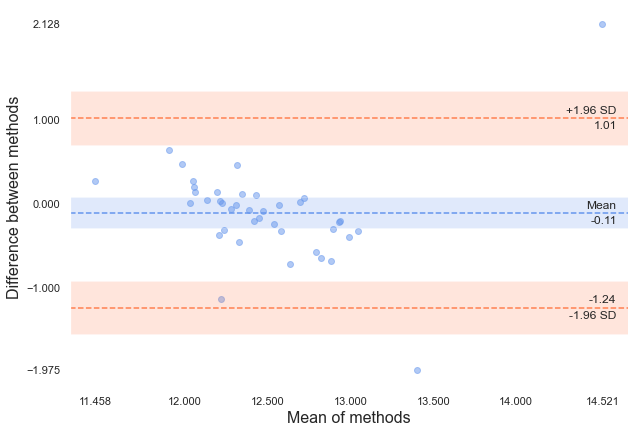

In [162]:
pyCompare.blandAltman(df2['phi_7_act_norm'].values, df2['phi_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

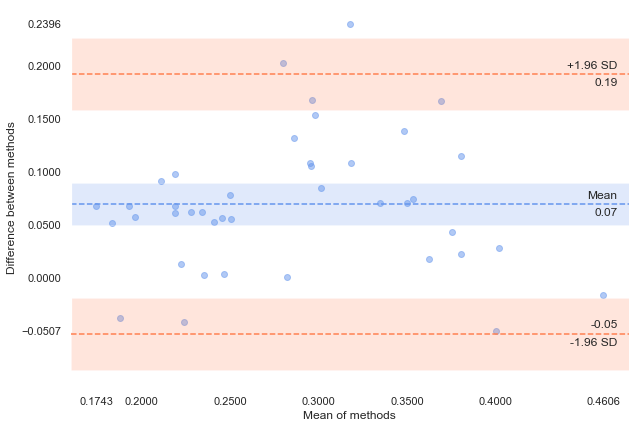

In [41]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['IS_7_act'].values, df2['IS_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

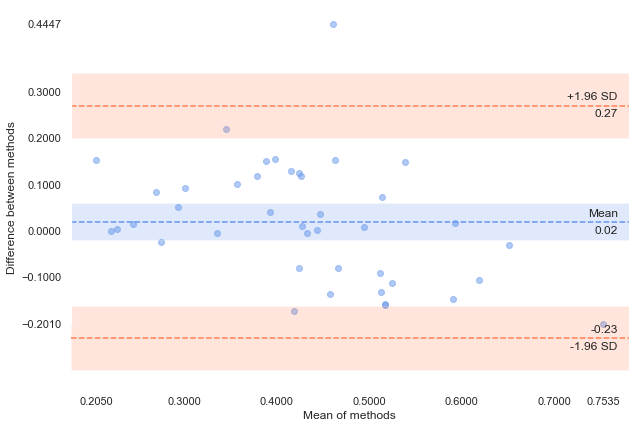

In [42]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['IV_7_act'].values, df2['IV_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

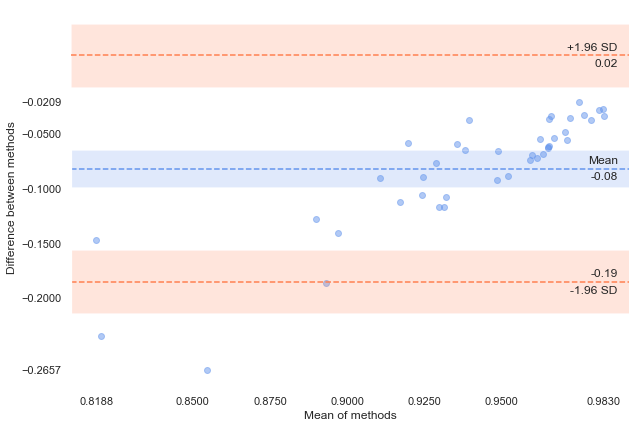

In [43]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['RA_7_act'].values, df2['RA_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

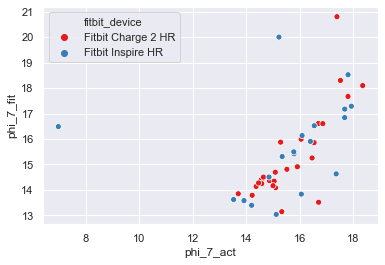

In [35]:
sns.scatterplot(x = 'phi_7_act', y = 'phi_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


In [36]:
df1['phi_7_fit'].corr(df1['phi_7_act'], method='pearson')

0.43831080336258643

In [37]:
df1['phi_7_fit'].corr(df1['phi_7_act'], method='spearman')

0.7085414739438791

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


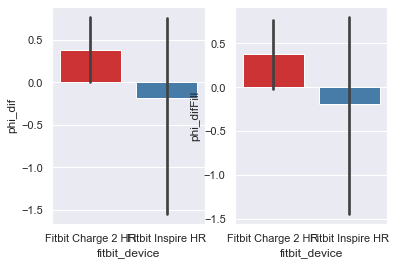

In [17]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=False)
sns.barplot(ax = axs[0], x = 'fitbit_device', y = 'phi_dif', ci=95, data = df1, palette = 'Set1')
sns.barplot(ax = axs[1], x = 'fitbit_device', y = 'phi_difFill', ci=95, data = df1, palette = 'Set1')



### Difference in acrophase and amplitude by age group and whether or not they used Beiwe

<AxesSubplot:xlabel='beiwe', ylabel='amp_dif'>

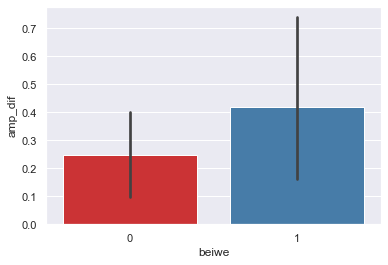

In [49]:
sns.barplot(x = 'beiwe', y = 'amp_dif', ci=95, data = df1, palette = 'Set1')

<AxesSubplot:xlabel='age_group', ylabel='amp_dif'>

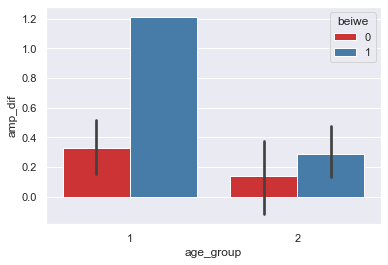

In [50]:
sns.barplot(x = 'age_group', y = 'amp_dif', hue = 'beiwe', ci=95, data = df1, palette = 'Set1')

<AxesSubplot:xlabel='age_group', ylabel='phi_dif'>

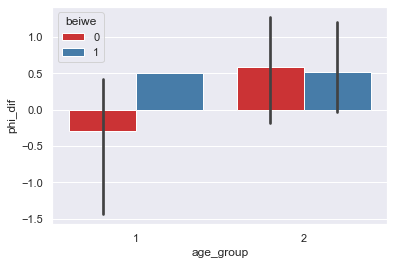

In [51]:
sns.barplot(x = 'age_group', y = 'phi_dif', hue = 'beiwe', ci=95, data = df1, palette = 'Set1')


### Difference in acrophase and amplitude by age group and fitbit device

<AxesSubplot:xlabel='age_group', ylabel='amp_dif'>

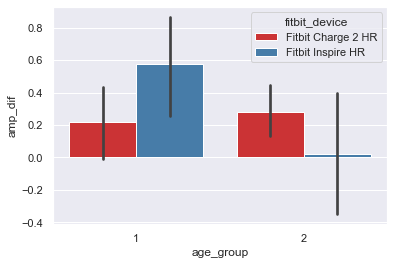

In [52]:
sns.barplot(x = 'age_group', y = 'amp_dif', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')



<AxesSubplot:xlabel='age_group', ylabel='phi_dif'>

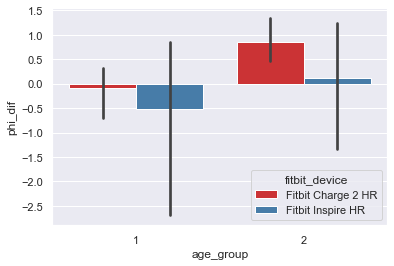

In [53]:
sns.barplot(x = 'age_group', y = 'phi_dif', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')



graph this by % missing data

### Redo - by n days used for cr measure calculation

In [66]:
dfmelt = pd.melt(df1.reset_index(), id_vars=['subject','fitbit_device'], value_vars=df1.columns[~df1.columns.str.contains('subject|device')])
dfmelt['n_days'] = dfmelt['variable'].str.split('_').str[1]
dfmelt['variable'] = dfmelt['variable'].str.split('_').str[0]
dfmelt

,subject,fitbit_device,variable,value,n_days
0,10011,Fitbit Charge 2 HR,age,1.000000,group
1,10012,Fitbit Charge 2 HR,age,1.000000,group
2,10014,Fitbit Charge 2 HR,age,1.000000,group
3,10016,Fitbit Charge 2 HR,age,1.000000,group
4,10024,Fitbit Charge 2 HR,age,1.000000,group
...,...,...,...,...,...
2179,20174,Fitbit Inspire HR,phi,NaN,difFill
2180,20177,Fitbit Inspire HR,phi,0.276602,difFill
2181,20178,Fitbit Inspire HR,phi,0.340073,difFill
2182,20180,Fitbit Charge 2 HR,phi,0.827490,difFill


In [213]:
df2 = dfmelt.pivot_table(index=['subject', 'device', 'n_days'], 
                    columns='variable', 
                    values='value').reset_index().set_index('subject')
df2

variable,device,n_days,actmin,alpha,amp,beta,phi
subject,,,,,,,
10011,Actiwatch 2.0,10,1.363726e+00,-0.746322,1.548120,16.382556,14.705452
10011,Actiwatch 2.0,7,1.175642e+00,-0.731704,1.639313,409.696423,14.860626
10011,Fitbit Charge 2 HR,10,2.430395e-13,-0.631359,1.624958,11.522257,14.362384
10011,Fitbit Charge 2 HR,7,6.455933e-02,-0.603692,1.255278,440.486311,14.471933
10011_repeat,Actiwatch 2.0,10,1.469762e+00,-0.777402,1.437241,9.071246,15.102758
...,...,...,...,...,...,...,...
20181,Actiwatch 2.0,7,1.053967e+00,-0.615047,1.826433,11.656873,15.115342
20182,Actiwatch 2.0,10,9.838579e-01,-0.729434,1.840887,5.559503,15.244310
20182,Actiwatch 2.0,7,1.046134e+00,-0.521339,1.713977,21.296197,15.295543


[Text(0, 0.5, 'Slope'), Text(0.5, 0, 'Days of Actigraphy')]

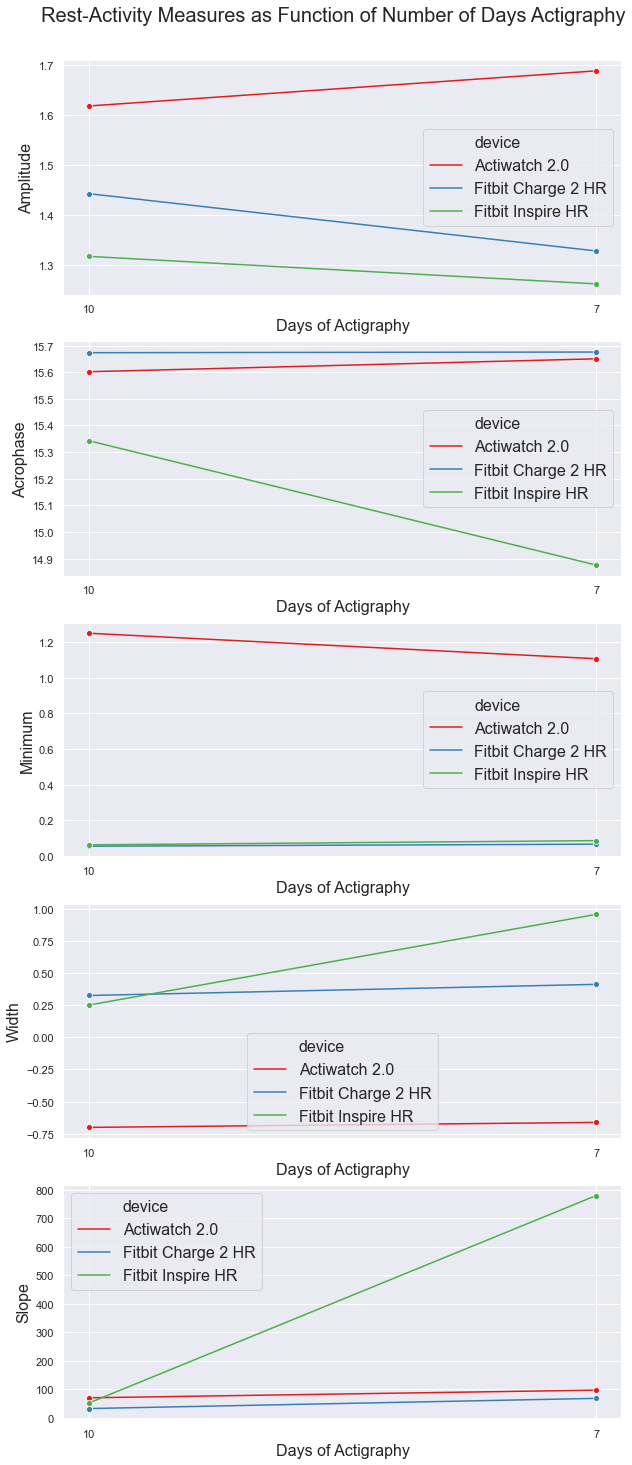

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, sharey=False, sharex=False, figsize = (10, 25))
fig.suptitle('Rest-Activity Measures as Function of Number of Days Actigraphy', fontsize = 20, y=.91)

sns.lineplot(x = 'n_days', y = 'amp', hue = 'device', data = df2, ax = ax[0], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Amplitude')
sns.lineplot(x = 'n_days', y = 'phi', hue = 'device', data = df2, ax = ax[1], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Acrophase')
sns.lineplot(x = 'n_days', y = 'actmin', hue = 'device', data = df2, ax = ax[2], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Minimum')
sns.lineplot(x = 'n_days', y = 'alpha', hue = 'device', data = df2, ax = ax[3], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Width')
sns.lineplot(x = 'n_days', y = 'beta', hue = 'device', data = df2, ax = ax[4], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Slope')


In [ ]:
dfmelt

In [ ]:
dfmelt['variable'].str.split('_')[1][1]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 1, sharey=False, sharex=False, figsize = (10, 25))
fig.suptitle('Rest-Activity Measures as Function of Number of Days Actigraphy', fontsize = 20, y=0.89)

ax[0].plot(recording_period_min, cr_act.filter(regex=("actmin.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[0].plot(recording_period_min, cr_fit.filter(regex=("actmin.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[0].set_title("Minimum")
ax[0].set_ylim(0,2)
ax[0].legend()

ax[1].plot(recording_period_min, cr_act.filter(regex=("amp.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[1].plot(recording_period_min, cr_fit.filter(regex=("amp.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[1].set_title("Amplitude")
ax[1].set_ylim(0,2)
ax[1].legend()

ax[2].plot(recording_period_min, cr_act.filter(regex=("alpha.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[2].plot(recording_period_min, cr_fit.filter(regex=("alpha.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[2].set_title("Alpha (Width)")
ax[2].legend()

ax[3].plot(recording_period_min, cr_act.filter(regex=("beta.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[3].plot(recording_period_min, cr_fit.filter(regex=("beta.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[3].set_title("Beta (Slope)")
ax[3].legend()

ax[4].plot(recording_period_min, cr_act.filter(regex=("phi.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[4].plot(recording_period_min, cr_fit.filter(regex=("phi.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[4].set_title("Phi (Acrophase)")
ax[4].legend()

ax[4].set_xlabel('Number of Days', fontsize=16)

plt.subplots_adjust(top=0.85)



## Sleep Summary Stats

In [20]:
sleep = pd.read_csv(data_dir + 'dataset_2021_07_19.csv')
sleep = sleep[~sleep.index.isin(exclude)]

In [21]:
sleep[0:5]

,subject,redcap_id,age_group,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,onset_latency_fit,time_in_bed_fit,awake_duration_fit,wake_time_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,joinid,lag_time,arm
0,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.0,556.0,4.0,2019-10-25 05:19:00,552.0,508.0,4.0,10011 2019-10-25,NaN,1
1,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,NaN,NaN,NaN,NaN,482.0,NaN,NaN,10011 2019-10-26,1.0,1
2,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,NaN,NaN,NaN,NaN,538.5,NaN,NaN,10011 2019-10-27,1.0,1
3,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,10011 2019-10-28,1.0,1
4,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,10011 2019-10-29,1.0,1


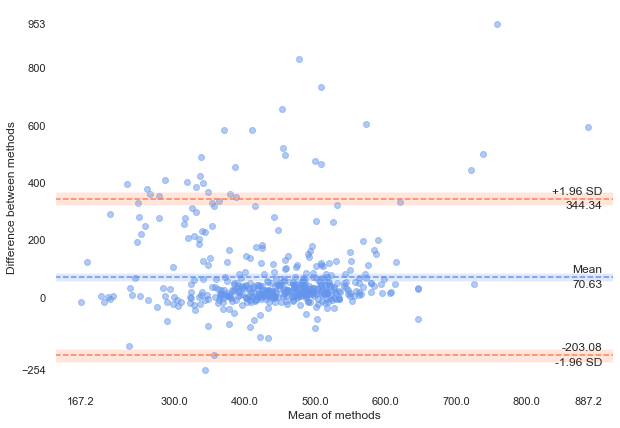

In [22]:
import pyCompare

sleep1 = sleep.dropna(axis = 0)

pyCompare.blandAltman(sleep1['sleep_duration_act'].values, sleep1['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

In [23]:
import pingouin as pg
pg.rm_corr(data=sleep, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.382482,435,1.132181e-16,"[0.3, 0.46]",1.0


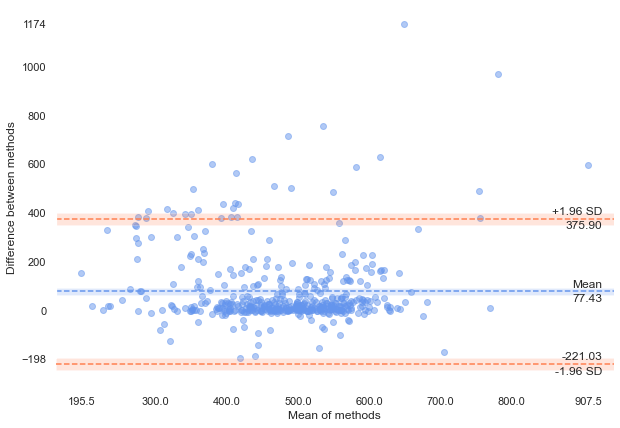

In [24]:
pyCompare.blandAltman(sleep1['time_in_bed_act'].values, sleep1['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=False)

In [25]:
pg.rm_corr(data=sleep, x='time_in_bed_act', y='time_in_bed_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.335674,435,5.712108e-13,"[0.25, 0.42]",1.0


# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

<AxesSubplot:xlabel='sleep_duration_act', ylabel='sleep_duration_fit'>

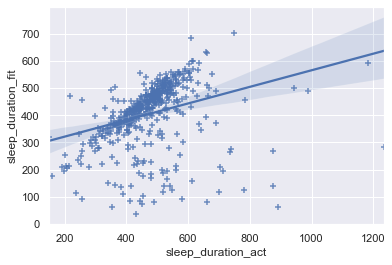

In [28]:
sns.regplot(data = sleep, x='sleep_duration_act', y='sleep_duration_fit', marker="+")

<AxesSubplot:xlabel='time_in_bed_act', ylabel='time_in_bed_fit'>

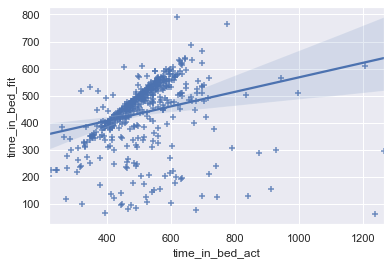

In [29]:
sns.regplot(data = sleep, x='time_in_bed_act', y='time_in_bed_fit', marker="+")